<a href="https://colab.research.google.com/github/snimale/ML-Learning/blob/master/SohamNimale_PracticeLinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the dataset provided on the group and in the drive perform the following tasks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

Read the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Assignment_2_dataset.csv")

Display first 5 rows of the dataset

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Find the No of Smokers and Non-smokers

In [ ]:
df.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


Find the number of people belonging to each region

In [ ]:
df.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


Find the mean standard deviation, Q1,Q2,Q3 etc for each column(think smartly :))

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Draw a plot to show relationships between all variables with one another in one plot

<ipython-input-111-233ca200bce1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)


<Axes: >

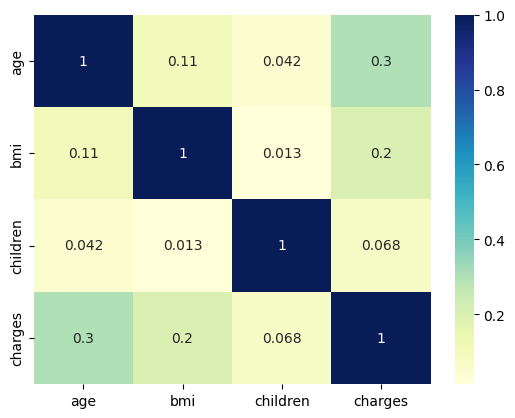

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

Find the number of null values in the dataset and remove them.

In [ ]:
 df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Plot a histogram to show the number of people within different age groups

<Axes: xlabel='age', ylabel='Count'>

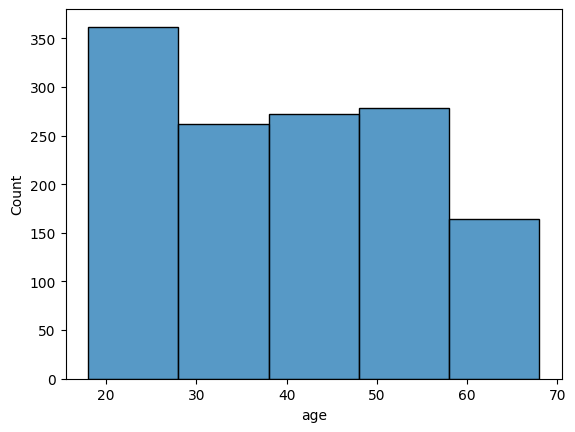

In [ ]:
sns.histplot(df['age'], bins=10, binwidth=10)

Plot to show the count of number of people belonging to each region

<Axes: xlabel='region'>

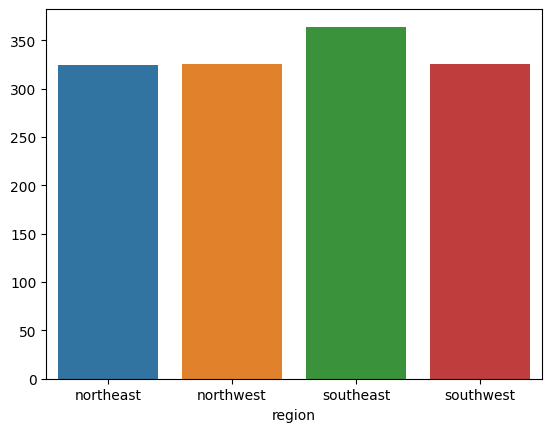

In [ ]:
series = df.groupby('region').size()
sns.barplot(x=series.index, y=series.values)

Perform one hot encoding of all the necessary variables.

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
df.dtypes
temp_df1 = pd.DataFrame(ohe.fit_transform(np.array(df['sex']).reshape(-1, 1)).toarray())
temp_df1.columns = ['Female', 'Male']
temp_df2 = pd.DataFrame(ohe.fit_transform(np.array(df['region']).reshape(-1, 1)).toarray())
temp_df2.columns = ['northeast', 'northwest', 'southeast', 'southwest']
temp_df3 = pd.DataFrame(ohe.fit_transform(np.array(df['smoker']).reshape(-1, 1)).toarray())
temp_df3.columns = ['notSmoker', 'smoker']
df = df.drop(columns=['smoker', 'region', 'sex'])

In [ ]:
df = pd.concat(objs=[df, temp_df1, temp_df2, temp_df3], axis=1)

In [ ]:
df.head(3)

,age,bmi,children,charges,Female,Male,northeast,northwest,southeast,southwest,notSmoker,smoker
0,19,27.90,0,16884.9240,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,18,33.77,1,1725.5523,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28,33.00,3,4449.4620,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Draw the correlation matrix and show it using a heatmap.Also Comment upon the correlation between the variables

<Axes: >

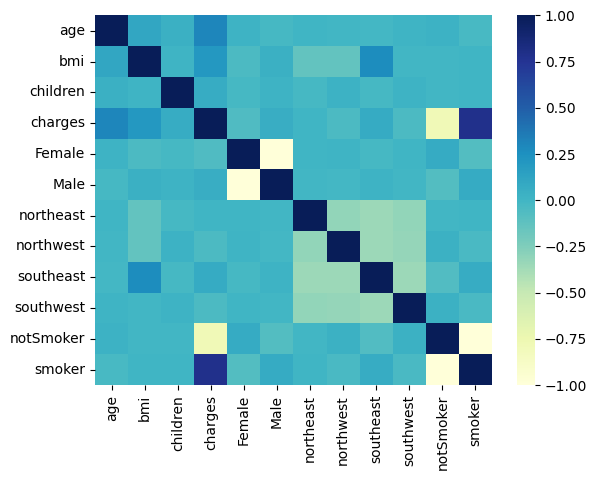

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu')

comments-

smokers - charges -> directly dependent

non smokers - charges -> inversly dependent

age - charges -> small directly dependent

southeast region - bmi -> small directly dependent

bmi - charges -> very small directly dependent

show coorelation using visualisation

i am assuming that you mean to show actual values in matrix

<Axes: >

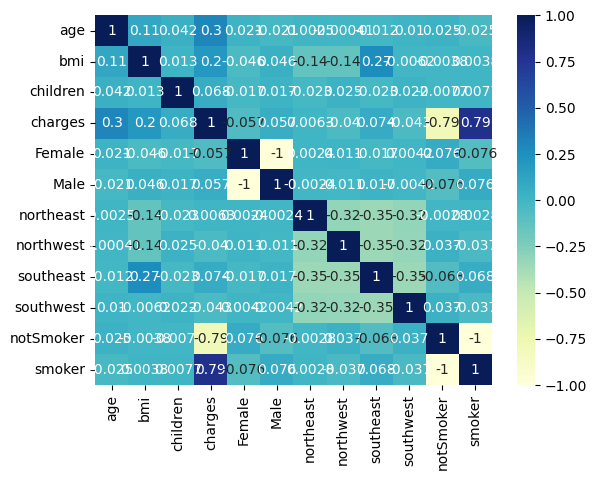

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

just in case you want corr vals without heatmap

In [ ]:
df.corr()

,age,bmi,children,charges,Female,Male,northeast,northwest,southeast,southwest,notSmoker,smoker
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251
Female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184,0.076185,-0.076185
Male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184,-0.076185,0.076185
northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811
northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945
southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498
southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945


Perform Normalization

In [ ]:
scaler = MinMaxScaler()
df[:] = pd.DataFrame(scaler.fit_transform(df[:]))

In [ ]:
# df.columns
df = df[['age', 'bmi', 'children', 'Female', 'Male', 'northeast', 'northwest', 'southeast', 'southwest', 'notSmoker', 'smoker', 'charges']]
df.head(3)

,age,bmi,children,Female,Male,northeast,northwest,southeast,southwest,notSmoker,smoker,charges
0,0.021739,0.321227,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.009636
2,0.217391,0.458434,0.6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.053115


getting ch2 for removing unwanted columns

In [ ]:
X = df.iloc[:, :-1].copy()
y = df['charges']
bestSelector = SelectKBest(score_func=f_regression, k='all')
SignificanceList = bestSelector.fit(X, y)
temp_col0 = pd.DataFrame(X.columns, columns=['Column Name'])
temp_col1 = pd.DataFrame(SignificanceList.scores_, columns=['Score'])
SignificanceDF = pd.concat([temp_col0, temp_col1], axis=1)

In [ ]:
SignificanceDF.sort_values('Score', ascending=False)

,Column Name,Score
9,notSmoker,2177.614868
10,smoker,2177.614868
0,age,131.174013
1,bmi,54.709308
7,southeast,7.352531
2,children,6.206037
4,Male,4.399702
3,Female,4.399702
8,southwest,2.499121
6,northwest,2.130837


In [ ]:
colsToDrop = SignificanceDF.loc[SignificanceDF['Score']<4]['Column Name']
df = df.drop(columns=colsToDrop)

In [ ]:
df.head(2)

,age,bmi,children,Female,Male,southeast,notSmoker,smoker,charges
0,0.021739,0.321227,0.0,1.0,0.0,0.0,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,1.0,1.0,1.0,0.0,0.009636


Perform Linear Regression Model to calculate the following to predict the amount of money that will be covered by health insurance and calculate

  *   Mean Squared Error
  *   R squared
  *   Mean Absolute Error
  *   Root Mean squared error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

R2 score

In [ ]:
test_r2 = metrics.r2_score(y_test, y_pred_test)
train_r2 = metrics.r2_score(y_train, y_pred_train)
print("train data r2 score - ", train_r2)
print("test data r2 score - ", test_r2)

train data r2 score -  0.7407821876410281
test data r2 score -  0.7818966994886778


Mean Squared Error

In [ ]:
sum((y_test-y_pred_test)**2)/len(y_test)

0.0075312027682472305

mean absolute error

In [ ]:
sum(abs(y_test-y_pred_test))/len(y_test)

0.06204773682119066

root mean squared error

In [ ]:
(sum((y_test-y_pred_test)**2)/len(y_test))**(1/2)

0.08678250266181098

graphical analysis

<Axes: ylabel='charges'>

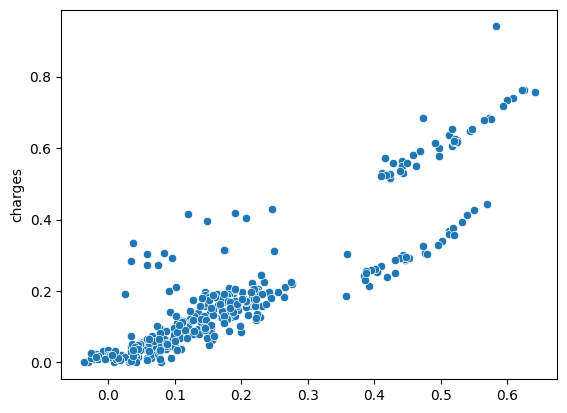

In [ ]:
sns.scatterplot(x=y_pred_test, y=y_test)

45 degree => y_test = y_pred_test